### Data exploration

In [1]:
import os
os.chdir("D:\Practice\Project-7\structuring_ds_projects")

In [2]:
import pandas as pd
df = pd.read_csv("data_given/adm_data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.iloc[:,1:-1].describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


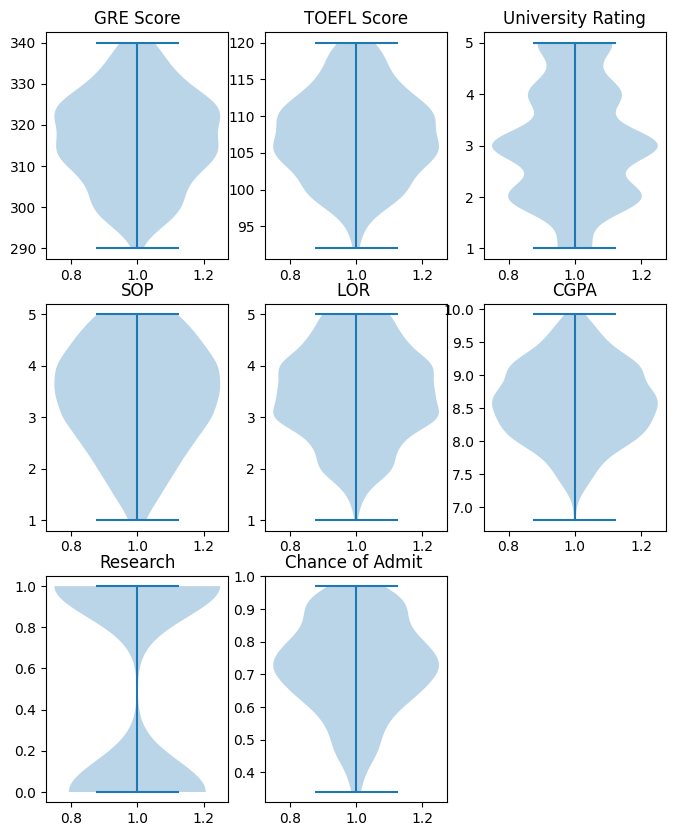

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()

columns = df.columns[1:]
i = 1
for column in columns:
    ax = fig.add_subplot(int(str("33"+str(i))))
    i +=1
    ax.violinplot(df[column])
    ax.set_title(column)
    
fig.set_figwidth(8)
fig.set_figheight(10)

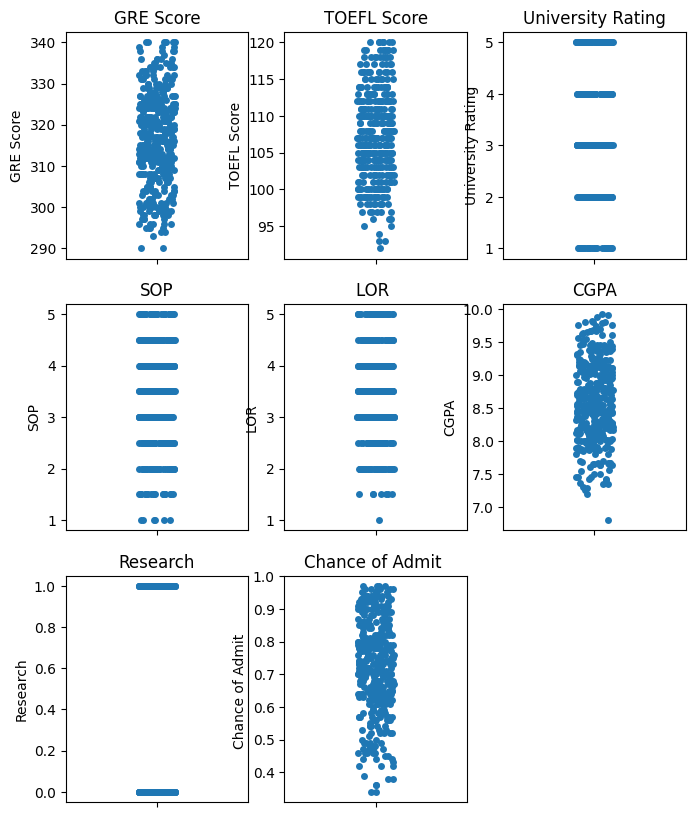

In [5]:
fig = plt.figure()

columns = df.columns[1:]
i = 1
for column in columns:
    ax = fig.add_subplot(int(str("33"+str(i))))
    i +=1
    ax = sns.stripplot(df[column])
    ax.set_title(column)
    
fig.set_figwidth(8)
fig.set_figheight(10)

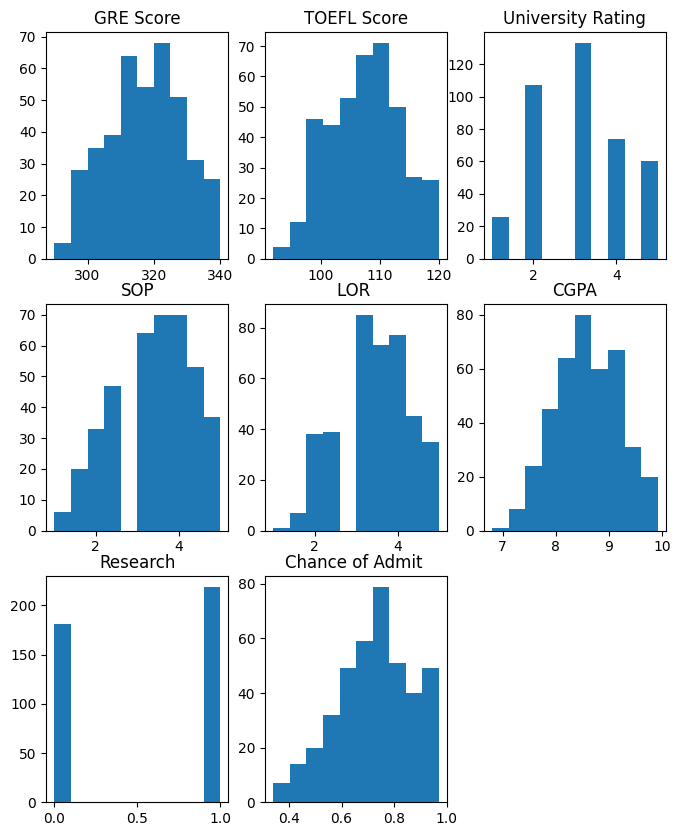

In [6]:
fig = plt.figure()

columns = df.columns[1:]
i = 1
for column in columns:
    ax = fig.add_subplot(int(str("33"+str(i))))
    i +=1
    ax.hist(df[column])
    ax.set_title(column)
    
fig.set_figwidth(8)
fig.set_figheight(10)

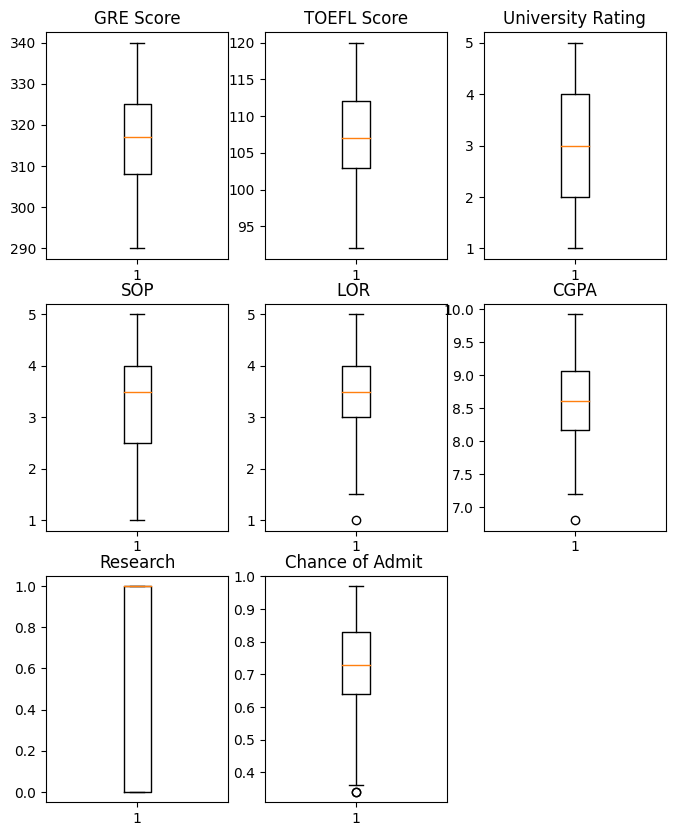

In [7]:
fig = plt.figure()

columns = df.columns[1:]
i = 1
for column in columns:
    ax = fig.add_subplot(int(str("33"+str(i))))
    i +=1
    ax.boxplot(df[column])
    ax.set_title(column)
    
fig.set_figwidth(8)
fig.set_figheight(10)

<AxesSubplot: >

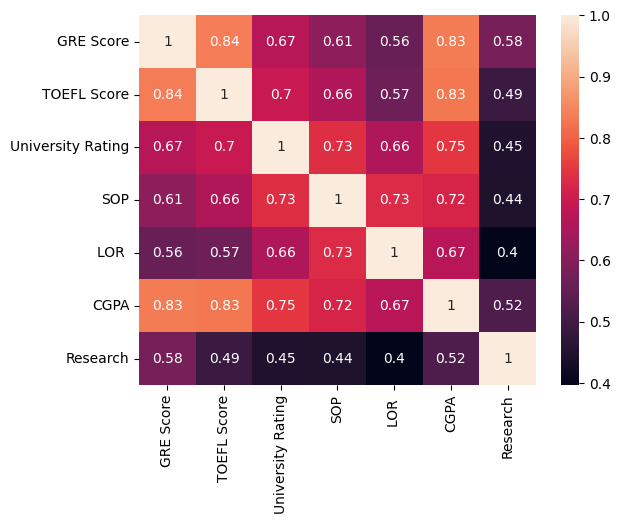

In [8]:
sns.heatmap(df.iloc[:,1:-1].corr(), annot=True)

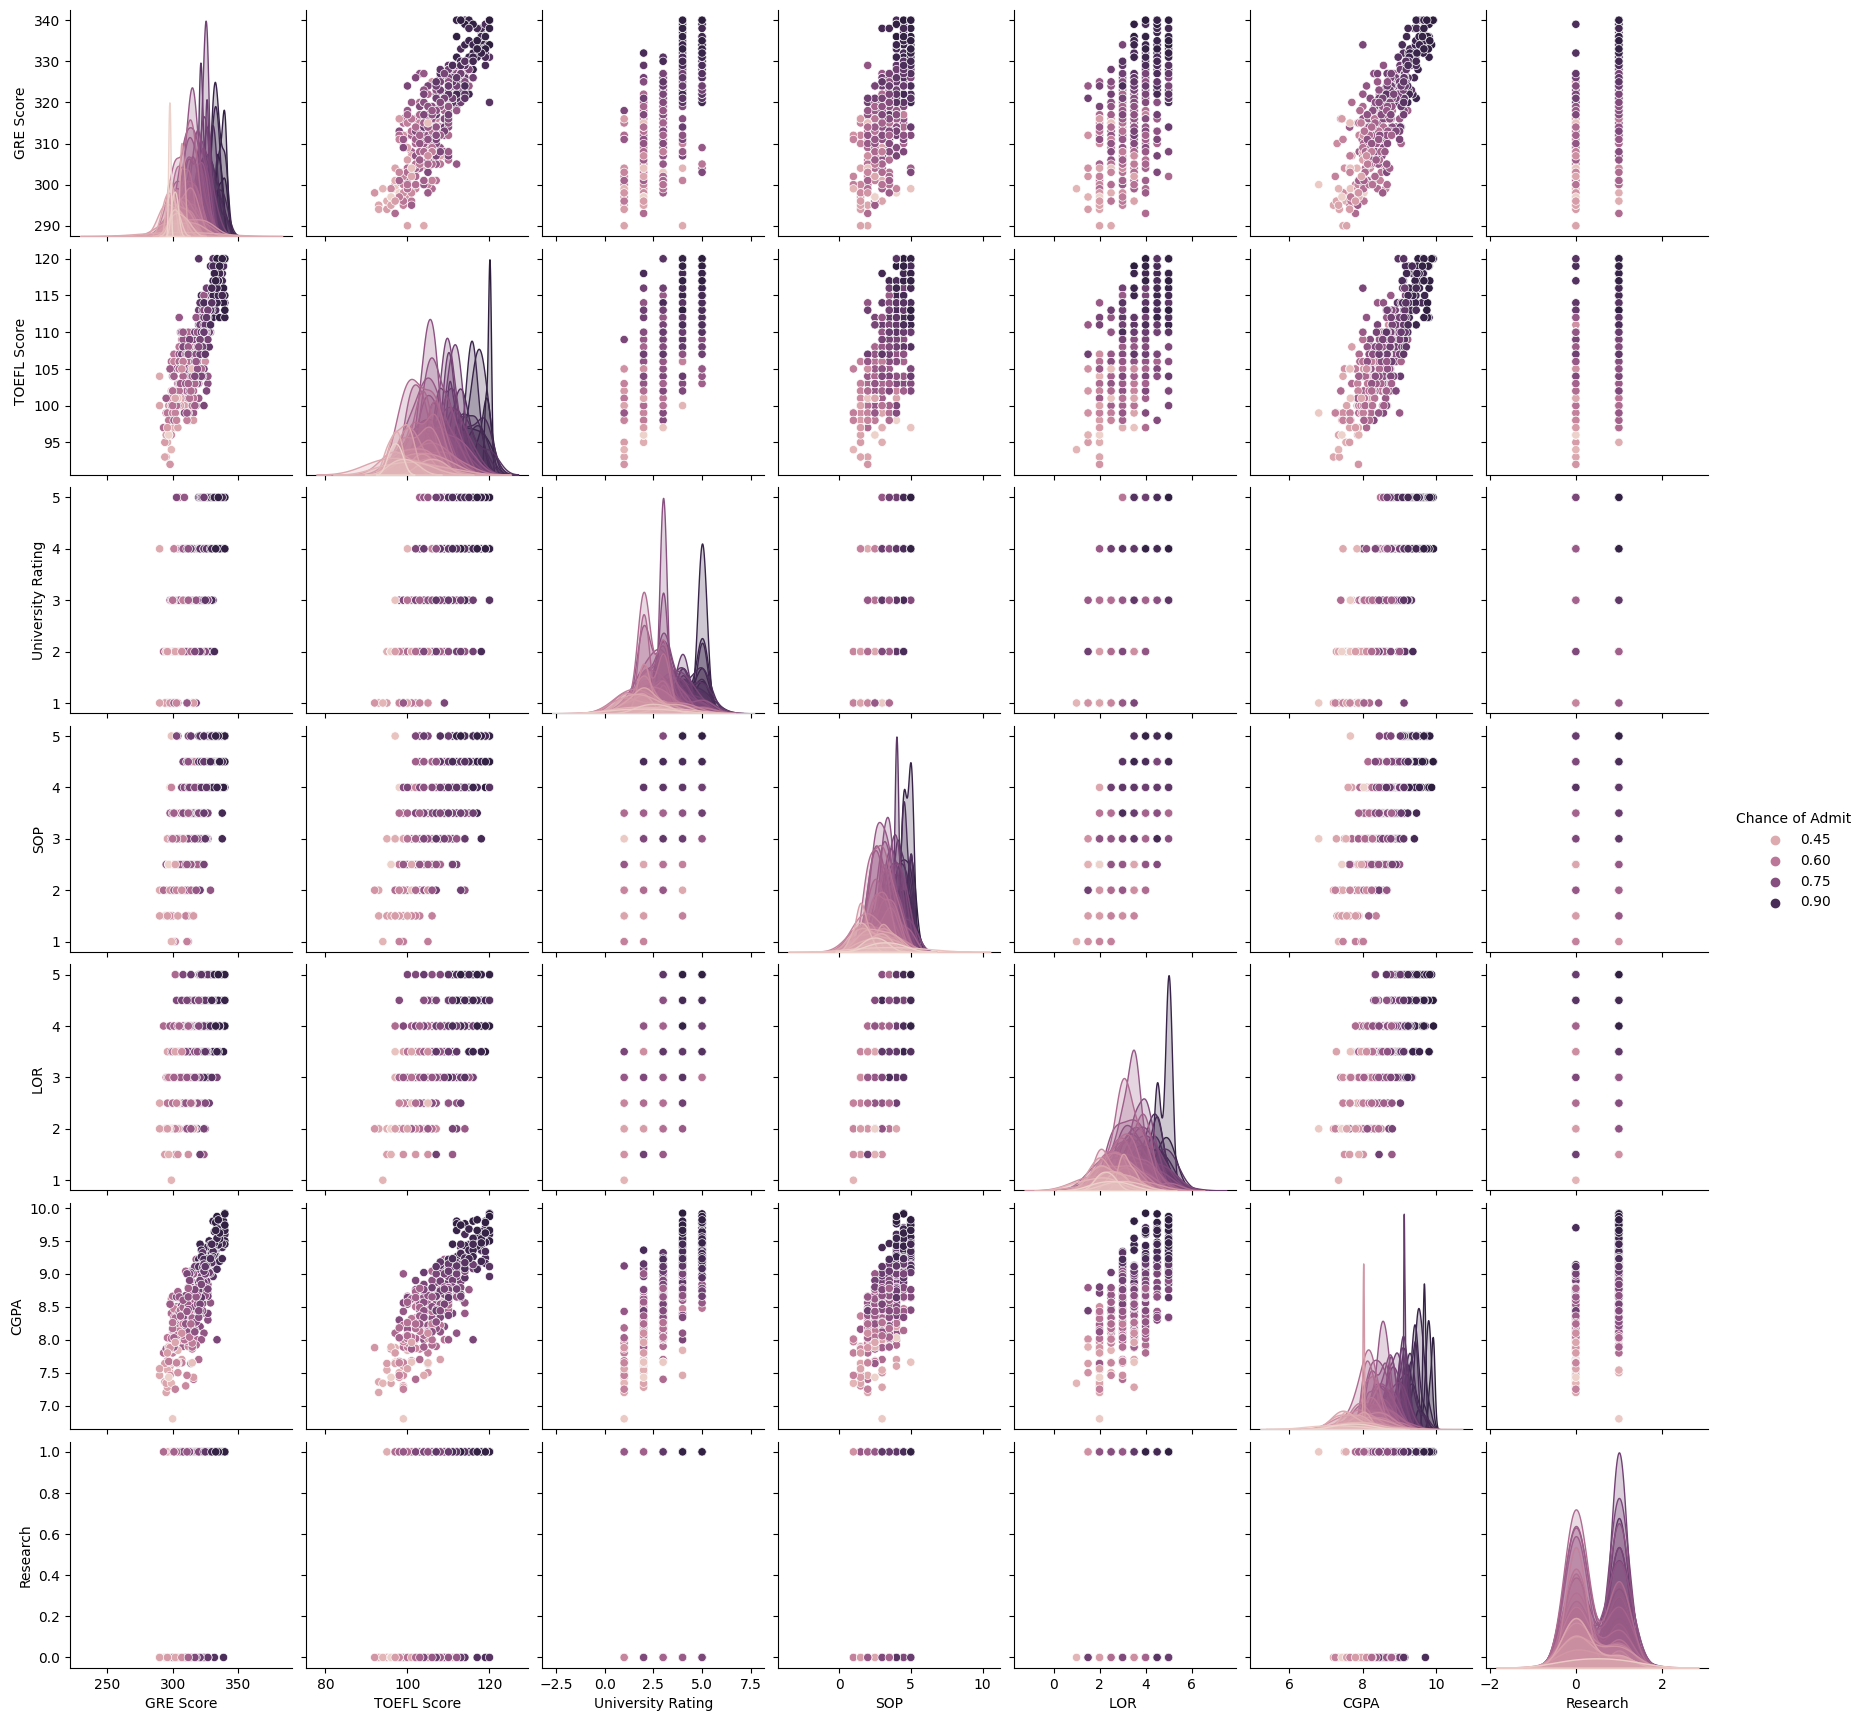

In [9]:
sns.pairplot(df.iloc[:,1:], hue=df.columns[-1])

In [10]:
# Possible chance of outlier in LOR and CGPA as seen from box plots
# Toefl score and GRE show a high correlation
# Although GRE score and CGPA show high correlation, based on field specific experience they both play an important role

In [11]:
# Finding outliers
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
q1 = df["LOR"].describe()[4]
q3 = df["LOR"].describe()[6]
iqr = q3 - q1
lor_upper_limit = q3 + 1.5*(iqr)
lor_lower_limit = q1 - 1.5*(iqr)
print(lor_upper_limit)
print(lor_lower_limit)

5.5
1.5


In [13]:
df[(df["LOR"]>lor_upper_limit) | (df["LOR"]<lor_lower_limit)]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,348,299,94,1,1.0,1.0,7.34,0,0.42


In [14]:
# High impact of Research on above case
# Checking CGPA

In [15]:
q1 = df["CGPA"].describe()[4]
q3 = df["CGPA"].describe()[6]
iqr = q3 - q1
cgpa_upper_limit = q3 + 1.5*(iqr)
cgpa_lower_limit = q1 - 1.5*(iqr)
print(cgpa_upper_limit)
print(cgpa_lower_limit)

10.401250000000001
6.83125


In [16]:
df[(df["CGPA"]>cgpa_upper_limit) | (df["CGPA"]<cgpa_lower_limit)]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,59,300,99,1,3.0,2.0,6.8,1,0.36


In [17]:
# Both rows follow same trend as that of the other variables, dropping features in order to get better scaling techniques

### Standardizing and scaling

In [18]:
q1 = df["LOR"].describe()[4]
q3 = df["LOR"].describe()[6]
iqr = q3 - q1
lor_upper_limit = q3 + 1.5*(iqr)
lor_lower_limit = q1 - 1.5*(iqr)
print(lor_upper_limit)
print(lor_lower_limit)

5.5
1.5


In [19]:
q1 = df["CGPA"].describe()[4]
q3 = df["CGPA"].describe()[6]
iqr = q3 - q1
cgpa_upper_limit = q3 + 1.5*(iqr)
cgpa_lower_limit = q1 - 1.5*(iqr)
print(cgpa_upper_limit)
print(cgpa_lower_limit)

10.401250000000001
6.83125


In [20]:
df = df[(df["LOR"]<lor_upper_limit) | (df["LOR"]>lor_lower_limit)]
df = df[(df["CGPA"]<cgpa_upper_limit) | (df["CGPA"]>cgpa_lower_limit)]

In [21]:
df.drop(["Serial No.", "TOEFL Score"], axis=1, inplace=True)
df.head()

,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,4,4.5,4.5,9.65,1,0.92
1,324,4,4.0,4.5,8.87,1,0.76
2,316,3,3.0,3.5,8.00,1,0.72
3,322,3,3.5,2.5,8.67,1,0.80
4,314,2,2.0,3.0,8.21,0,0.65


In [22]:
df.describe()

,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [23]:
print("Unique values of SOP are: ", str(df["SOP"].unique()))
print("Unique values of LOR are: ", str(df["LOR"].unique()))
print("Unique values of University Rating are: ", str(df["University Rating"].unique()))

Unique values of SOP are:  [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
Unique values of LOR are:  [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
Unique values of University Rating are:  [4 3 2 5 1]


### Train test split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df.iloc[:,:-1], df.iloc[:,-1], 
                                        train_size=0.7,
                                        random_state=3)

In [25]:
X_train

,GRE Score,University Rating,SOP,LOR,CGPA,Research
236,325,4,4.0,4.5,9.17,1
65,325,4,3.5,3.5,8.92,0
286,336,5,4.5,4.0,9.19,1
180,300,3,3.5,3.0,8.16,0
323,305,2,2.0,2.5,8.18,0
...,...,...,...,...,...,...
256,309,3,4.0,4.0,8.56,0
131,303,5,5.0,4.5,8.65,0
249,321,3,3.5,4.0,8.83,1
152,321,5,5.0,5.0,9.06,1


In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np

gre_scaler = StandardScaler()
cgpa_scaler = StandardScaler()

X_train["GRE Score"] = gre_scaler.fit_transform(np.array(X_train["GRE Score"]).reshape(-1,1))
X_test["GRE Score"] = gre_scaler.transform(np.array(X_test["GRE Score"]).reshape(-1,1))

X_train["CGPA"] = cgpa_scaler.fit_transform(np.array(X_train["CGPA"]).reshape(-1,1))
X_test["CGPA"] = cgpa_scaler.transform(np.array(X_test["CGPA"]).reshape(-1,1))

In [27]:
X_train

,GRE Score,University Rating,SOP,LOR,CGPA,Research
236,0.733729,4,4.0,4.5,0.978660,1
65,0.733729,4,3.5,3.5,0.553024,0
286,1.694974,5,4.5,4.0,1.012711,1
180,-1.450918,3,3.5,3.0,-0.740912,0
323,-1.013988,2,2.0,2.5,-0.706861,0
...,...,...,...,...,...,...
256,-0.664445,3,4.0,4.0,-0.059893,0
131,-1.188760,5,5.0,4.5,0.093336,0
249,0.384186,3,3.5,4.0,0.399794,1
152,0.384186,5,5.0,5.0,0.791380,1


In [40]:
gre_scaler.transform(np.array(324).reshape(-1,1))[0][0]

0.6463435438210611

### Model training

In [28]:
import pycaret

In [51]:

from pycaret.regression import setup
from pycaret.regression import tune_model
from pycaret.regression import compare_models

# set column names as the column number
n_cols = df.shape[1]
df.columns = [str(i) for i in range(n_cols)]
# setup the dataset
grid = setup(data=df.iloc[:,:-1], target=df.iloc[:, -1], html=False, verbose=False)
# tune model hyperparameters
best =compare_models()

                                    Model     MAE     MSE    RMSE      R2  \
ridge                    Ridge Regression  0.0486  0.0047  0.0666  0.7855   
br                         Bayesian Ridge  0.0487  0.0047  0.0666  0.7854   
lr                      Linear Regression  0.0487  0.0047  0.0667  0.7851   
lar                Least Angle Regression  0.0487  0.0047  0.0667  0.7851   
omp           Orthogonal Matching Pursuit  0.0526  0.0051  0.0702  0.7603   
huber                     Huber Regressor  0.0532  0.0055  0.0725  0.7465   
et                  Extra Trees Regressor  0.0510  0.0053  0.0724  0.7444   
rf                Random Forest Regressor  0.0509  0.0056  0.0735  0.7379   
gbr           Gradient Boosting Regressor  0.0518  0.0056  0.0736  0.7334   
lightgbm  Light Gradient Boosting Machine  0.0538  0.0058  0.0751  0.7244   
ada                    AdaBoost Regressor  0.0616  0.0062  0.0781  0.7084   
knn                 K Neighbors Regressor  0.0586  0.0065  0.0796  0.6986   

In [53]:
from sklearn.linear_model import Ridge
best = tune_model(Ridge(), n_iter=200, choose_better=True, verbose=)
# report the best model
print(best)

Processing:   0%|                                                                    | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0796  0.0107  0.1035  0.5918  0.0645  0.1401
1     0.0494  0.0049  0.0701  0.7817  0.0429  0.0801
2     0.0495  0.0044  0.0664  0.8235  0.0408  0.0785
3     0.0496  0.0050  0.0709  0.7690  0.0455  0.0860
4     0.0352  0.0020  0.0444  0.8942  0.0258  0.0470
5     0.0405  0.0036  0.0602  0.8307  0.0377  0.0676
6     0.0450  0.0044  0.0663  0.7171  0.0404  0.0709
7     0.0399  0.0023  0.0476  0.8800  0.0280  0.0558
8     0.0466  0.0039  0.0623  0.7570  0.0380  0.0718
9     0.0509  0.0055  0.0742  0.8110  0.0486  0.1004
Mean  0.0486  0.0047  0.0666  0.7856  0.0412  0.0798
Std   0.0114  0.0023  0.0154  0.0826  0.0103  0.0246
Ridge(alpha=1.7, normalize=False)


In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

model1 = Ridge()
model1.fit(X_train, y_train)
print(r2_score(y_train, model1.predict(X_train)))
print(r2_score(y_test, model1.predict(X_test)))

0.798963737956687
0.7986193326102902


In [50]:
model1.alpha

1.0

In [47]:
model1.predict(np.array([0.733729, 4, 4.5, 4.5, 0.978660, 1]).reshape(1,-1)) 


array([0.85956781])

In [44]:
model1.predict(X_test)

array([0.47469833, 0.70938904, 0.83337986, 0.86161271, 0.92315915,
       0.83335223, 0.82032368, 0.54158009, 0.71690238, 0.63198452,
       0.83888677, 0.68481969, 0.51347674, 0.64150019, 0.71981427,
       0.77038076, 0.52072038, 0.84990873, 0.71226921, 0.63509792,
       0.65242034, 0.79536236, 0.63982677, 0.83104253, 0.80743949,
       0.96956344, 0.64075562, 0.85025319, 0.79928116, 0.94366922,
       0.84263268, 0.86472541, 0.78088225, 0.80652146, 0.88282812,
       0.80051993, 0.66176278, 0.67230507, 0.71376717, 0.69244662,
       0.59157471, 0.73526957, 0.73139061, 0.94584461, 0.62915034,
       0.76293522, 0.84923393, 0.89418608, 0.67322638, 0.62492972,
       0.8838707 , 0.61701813, 0.76562596, 0.66360067, 0.52777469,
       0.52116947, 0.58872554, 0.45834032, 0.69674761, 0.73554078,
       0.80927597, 0.66923   , 0.95377743, 0.8836835 , 0.88754399,
       0.74568775, 0.91620619, 0.47581583, 0.85624796, 0.69527661,
       0.78475635, 0.9005528 , 0.93289764, 0.67279163, 0.45623